In [86]:
import graphlab

### below from week 3, for higher degree polynomial

In [87]:
def polynomial_sframe(feature, degree):
    poly_sframe = graphlab.SFrame()        # initialize the SFrame
    poly_sframe['power_1'] = feature        # set poly_sframe['power_1'] equal to the passed feature
    

    if degree > 1:                         # first check if degree > 1
        for power in range(2, degree+1): 
            name = 'power_' + str(power)  # gives name to the column
            poly_sframe[name] = poly_sframe['power_1'].apply(lambda x: x**power)  # assign appropriate power of feature
            
    return poly_sframe

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
sales = graphlab.SFrame('kc_house_data.gl/')

In [90]:
sales = sales.sort(['sqft_living','price'])

### generate a 15th degree 

In [85]:
#poly15_data = polynomial_sframe(sales['sqft_living'], 15)

In [84]:
#my_features = poly15_data.column_names() # get the name of the features
#poly15_data['price'] = sales['price'] # add price to the data since it's the target
#model15 = graphlab.linear_regression.create(poly15_data, target = 'price', features = my_features, validation_set = None)

#model15.get("coefficients")

#plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
#        poly15_data['power_1'], model15.predict(poly15_data),'-')

### add a penalty, looking at ridge rather than linear like above

In [104]:
def fit15_deg_poly(data, l2_penalty):    
    poly15_data = polynomial_sframe(data['sqft_living'], 15)  # this is the x values
    my_features = poly15_data.column_names() # get the name of the 15 features
    poly15_data['price'] = data['price'] # add in the y values after extract the features
    model_ridge = graphlab.linear_regression.create(poly15_data, 
                                                target = 'price', 
                                                features = my_features, 
                                                l2_penalty=l2_penalty, 
                                                validation_set = None, 
                                                verbose=False)
    
    model_ridge.get("coefficients").print_rows(num_rows=16)
    
    plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
        poly15_data['power_1'], model15.predict(poly15_data),'-')

+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |   167924.855861    |   932257.186892   |
|   power_1   |  None |    103.09095592    |   4735.64035967   |
|   power_2   |  None |   0.13460454755    |   9.85916588414   |
|   power_3   |  None | -0.000129071363621 |  0.0111681951166  |
|   power_4   |  None | 5.18928964915e-08  | 7.69612916365e-06 |
|   power_5   |  None | -7.77169343059e-12 | 3.40375275378e-09 |
|   power_6   |  None | 1.71144917832e-16  | 9.86487804671e-13 |
|   power_7   |  None | 4.51177946027e-20  | 1.85595593561e-16 |
|   power_8   |  None | -4.78840959928e-25 | 2.13680012359e-20 |
|   power_9   |  None | -2.33343401694e-28 | 1.22638025544e-24 |
|   power_10  |  None | -7.29021980005e-33 | 3.82656969545e-29 |
|   power_11  |  None | 7.22828482444e-37  |  4.2913989084e-33 |
|   power_12  |  None | 6

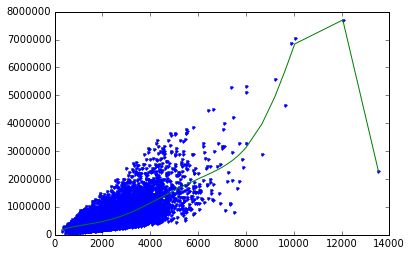

In [100]:
l2_small_penalty = 1e-5
fit15_deg_poly(sales, l2_small_penalty)



# Observe overfitting

In [105]:
(semi_split1, semi_split2) = sales.random_split(.5,seed=0)
(set_1, set_2) = semi_split1.random_split(0.5, seed=0)
(set_3, set_4) = semi_split2.random_split(0.5, seed=0)

+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |    9306.4606221    |   1255976.06157   |
|   power_1   |  None |   585.865823394    |   6003.28876462   |
|   power_2   |  None |  -0.397305895643   |   11.9613259026   |
|   power_3   |  None | 0.000141470900599  |  0.0131345206929  |
|   power_4   |  None | -1.52945989958e-08 | 8.84846297281e-06 |
|   power_5   |  None | -3.79756325772e-13 | 3.83736176297e-09 |
|   power_6   |  None | 5.97481763253e-17  | 1.08407665704e-12 |
|   power_7   |  None | 1.06888504767e-20  | 1.93500977266e-16 |
|   power_8   |  None | 1.59344027887e-25  | 1.89384579435e-20 |
|   power_9   |  None | -6.92834984105e-29 |        nan        |
|   power_10  |  None | -6.83813287347e-33 | 3.49595202136e-29 |
|   power_11  |  None | -1.62686187633e-37 | 2.50639941958e-33 |
|   power_12  |  None | 2

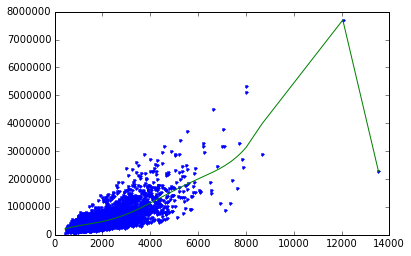

In [106]:
l2_small_penalty = 1e-5
fit15_deg_poly(set_1, l2_small_penalty)

+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |   -25115.9044254   |   1573017.12178   |
|   power_1   |  None |    783.49380028    |   9293.98471763   |
|   power_2   |  None |  -0.767759302942   |   23.3971636819   |
|   power_3   |  None | 0.000438766369254  |  0.0331210085962  |
|   power_4   |  None | -1.15169166858e-07 | 2.93724988829e-05 |
|   power_5   |  None | 6.84281360981e-12  | 1.72037616446e-08 |
|   power_6   |  None | 2.51195187082e-15  | 6.82484060777e-12 |
|   power_7   |  None | -2.06440608259e-19 | 1.84509003318e-15 |
|   power_8   |  None | -4.59673022352e-23 | 3.35295936015e-19 |
|   power_9   |  None | -2.71279236963e-29 | 3.78708790458e-23 |
|   power_10  |  None | 6.21818431996e-31  |        nan        |
|   power_11  |  None | 6.51741386006e-35  |        nan        |
|   power_12  |  None | -

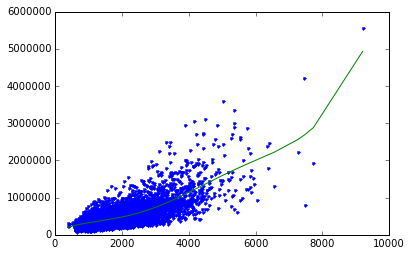

In [107]:
l2_small_penalty = 1e-5
fit15_deg_poly(set_2, l2_small_penalty)

+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |   462426.565731    |        nan        |
|   power_1   |  None |   -759.251842854   |        nan        |
|   power_2   |  None |    1.0286700473    |        nan        |
|   power_3   |  None | -0.000528264527386 |        nan        |
|   power_4   |  None | 1.15422908385e-07  |        nan        |
|   power_5   |  None | -2.26095948062e-12 |        nan        |
|   power_6   |  None | -2.08214287571e-15 |        nan        |
|   power_7   |  None | 4.08770475709e-20  |        nan        |
|   power_8   |  None |  2.570791329e-23   |        nan        |
|   power_9   |  None | 1.24311265196e-27  |        nan        |
|   power_10  |  None | -1.72025834939e-31 |        nan        |
|   power_11  |  None | -2.96761071315e-35 |        nan        |
|   power_12  |  None | -

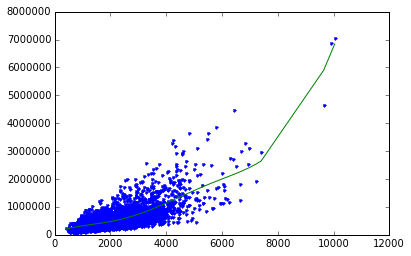

In [108]:
l2_small_penalty = 1e-5
fit15_deg_poly(set_3, l2_small_penalty)

+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |   -170240.032842   |   1543796.62885   |
|   power_1   |  None |   1247.59034541    |   9978.42791287   |
|   power_2   |  None |   -1.22460912177   |   26.7138477947   |
|   power_3   |  None | 0.000555254626344  |  0.0392072641565  |
|   power_4   |  None | -6.3826237386e-08  | 3.51264407588e-05 |
|   power_5   |  None | -2.20215991142e-11 | 2.00572757169e-08 |
|   power_6   |  None | 4.81834694285e-15  | 7.23449143456e-12 |
|   power_7   |  None | 4.21461612787e-19  | 1.43057715883e-15 |
|   power_8   |  None | -7.99880736276e-23 |        nan        |
|   power_9   |  None | -1.32365897487e-26 |        nan        |
|   power_10  |  None | 1.60197622166e-31  |  5.6453113885e-27 |
|   power_11  |  None | 2.39904337319e-34  | 9.66784867829e-31 |
|   power_12  |  None | 2

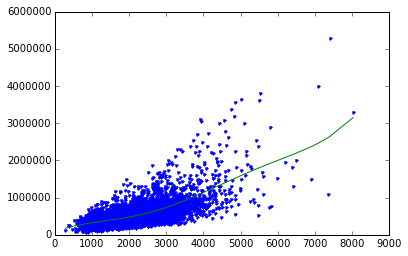

In [109]:
l2_small_penalty = 1e-5
fit15_deg_poly(set_4, l2_small_penalty)

# Ridge Regression comes to the rescue

In [110]:
l2_large_penalty=1e5

+-------------+-------+-------------------+-------------------+
|     name    | index |       value       |       stderr      |
+-------------+-------+-------------------+-------------------+
| (intercept) |  None |   530317.024516   |   1890090.19151   |
|   power_1   |  None |   2.58738875673   |   9034.21455077   |
|   power_2   |  None |  0.00127414400592 |    18.000330944   |
|   power_3   |  None | 1.74934226932e-07 |   0.019765845458  |
|   power_4   |  None | 1.06022119097e-11 | 1.33158533722e-05 |
|   power_5   |  None | 5.42247604482e-16 | 5.77475960841e-09 |
|   power_6   |  None | 2.89563828343e-20 | 1.63140263499e-12 |
|   power_7   |  None | 1.65000666351e-24 | 2.91195278612e-16 |
|   power_8   |  None | 9.86081528409e-29 | 2.85000603886e-20 |
|   power_9   |  None | 6.06589348254e-33 |        nan        |
|   power_10  |  None |  3.7891786887e-37 | 5.26097974934e-29 |
|   power_11  |  None | 2.38223121312e-41 | 3.77182424405e-33 |
|   power_12  |  None | 1.49847969215e-4

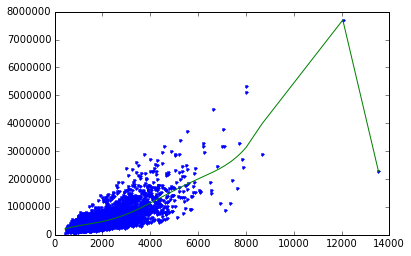

In [111]:
fit15_deg_poly(set_1, l2_large_penalty)

+-------------+-------+-------------------+-------------------+
|     name    | index |       value       |       stderr      |
+-------------+-------+-------------------+-------------------+
| (intercept) |  None |   519216.897383   |   2167962.96521   |
|   power_1   |  None |   2.04470474182   |   12809.1515268   |
|   power_2   |  None |  0.0011314362684  |   32.2464286313   |
|   power_3   |  None | 2.93074277549e-07 |  0.0456480218892  |
|   power_4   |  None | 4.43540598453e-11 |  4.0481752482e-05 |
|   power_5   |  None | 4.80849112204e-15 | 2.37105608016e-08 |
|   power_6   |  None | 4.53091707826e-19 | 9.40612881847e-12 |
|   power_7   |  None | 4.16042910575e-23 | 2.54293917341e-15 |
|   power_8   |  None | 3.90094635128e-27 | 4.62111417353e-19 |
|   power_9   |  None |  3.7773187602e-31 | 5.21943862496e-23 |
|   power_10  |  None | 3.76650326842e-35 |        nan        |
|   power_11  |  None | 3.84228094754e-39 |        nan        |
|   power_12  |  None | 3.98520828414e-4

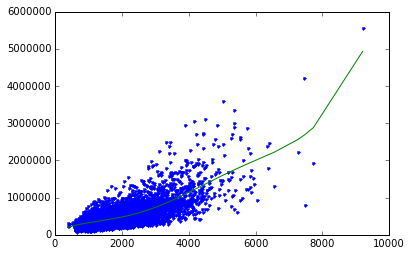

In [112]:
fit15_deg_poly(set_2, l2_large_penalty)

+-------------+-------+-------------------+-------------------+
|     name    | index |       value       |       stderr      |
+-------------+-------+-------------------+-------------------+
| (intercept) |  None |   522911.518048   |        nan        |
|   power_1   |  None |   2.26890421877   |        nan        |
|   power_2   |  None |  0.00125905041842 |        nan        |
|   power_3   |  None | 2.77552918155e-07 |        nan        |
|   power_4   |  None |  3.2093309779e-11 |        nan        |
|   power_5   |  None | 2.87573572364e-15 |        nan        |
|   power_6   |  None | 2.50076112671e-19 |        nan        |
|   power_7   |  None | 2.24685265906e-23 |        nan        |
|   power_8   |  None | 2.09349983135e-27 |        nan        |
|   power_9   |  None | 2.00435383296e-31 |        nan        |
|   power_10  |  None | 1.95410800249e-35 |        nan        |
|   power_11  |  None | 1.92734119456e-39 |        nan        |
|   power_12  |  None | 1.91483699013e-4

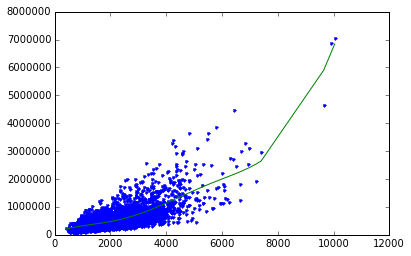

In [113]:
fit15_deg_poly(set_3, l2_large_penalty)

+-------------+-------+-------------------+-------------------+
|     name    | index |       value       |       stderr      |
+-------------+-------+-------------------+-------------------+
| (intercept) |  None |   513667.087087   |   2041482.90233   |
|   power_1   |  None |   1.91040938244   |   13195.2548642   |
|   power_2   |  None |  0.00110058029175 |   35.3258081465   |
|   power_3   |  None | 3.12753987879e-07 |   0.051846828738  |
|   power_4   |  None | 5.50067886825e-11 | 4.64504371162e-05 |
|   power_5   |  None | 7.20467557825e-15 | 2.65233027965e-08 |
|   power_6   |  None | 8.24977249384e-19 | 9.56673326956e-12 |
|   power_7   |  None | 9.06503223498e-23 | 1.89176395105e-15 |
|   power_8   |  None | 9.95683160453e-27 |        nan        |
|   power_9   |  None | 1.10838127982e-30 |        nan        |
|   power_10  |  None | 1.25315224143e-34 | 7.46523632876e-27 |
|   power_11  |  None | 1.43600781402e-38 | 1.27845516761e-30 |
|   power_12  |  None |  1.662699678e-42

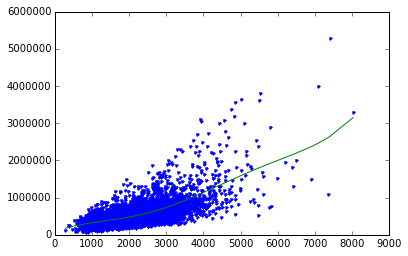

In [114]:
fit15_deg_poly(set_4, l2_large_penalty)

# Selecting an L2 penalty via cross-validation

so far, we  have picked our l2 penalties.  if we use cross validation, we can generate the optimal weights

In [120]:
(train_valid, test) = sales.random_split(.9, seed=1)
train_valid_shuffled = graphlab.toolkits.cross_validation.shuffle(train_valid, random_seed=1)

In [121]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in xrange(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print i, (start, end)

0 (0, 1938)
1 (1939, 3878)
2 (3879, 5817)
3 (5818, 7757)
4 (7758, 9697)
5 (9698, 11636)
6 (11637, 13576)
7 (13577, 15515)
8 (15516, 17455)
9 (17456, 19395)


In [125]:
# want segmetn 3 

validation4 = train_valid_shuffled[5818:7758]

In [126]:
print int(round(validation4['price'].mean(), 0))

536234


In [127]:
# want to just have all the data as trainng except segment 4

n = len(train_valid_shuffled)
first = train_valid_shuffled[0:5818]
last = train_valid_shuffled[7758:n+1]
train4 = first.append(last)

print train4

+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 2780400035 | 2014-05-05 00:00:00+00:00 | 665000.0 |   4.0    |    2.5    |
| 1703050500 | 2015-03-21 00:00:00+00:00 | 645000.0 |   3.0    |    2.5    |
| 5700002325 | 2014-06-05 00:00:00+00:00 | 640000.0 |   3.0    |    1.75   |
| 0475000510 | 2014-11-18 00:00:00+00:00 | 594000.0 |   3.0    |    1.0    |
| 0844001052 | 2015-01-28 00:00:00+00:00 | 365000.0 |   4.0    |    2.5    |
| 2658000373 | 2015-01-22 00:00:00+00:00 | 305000.0 |   4.0    |    2.0    |
| 3750603471 | 2015-03-27 00:00:00+00:00 | 239950.0 |   3.0    |    2.5    |
| 2114700540 | 2014-10-21 00:00:00+00:00 | 366000.0 |   3.0    |    2.5    |
| 2596400050 | 2014-07-30 00:00:00+00:00 | 375000.0 |   3.0    |    1.0    |
| 4140900050 | 2015-01-26 00:00:00+00:00 | 440000.0 |   4.0    |    1.75   |

In [128]:
print int(round(train4['price'].mean(), 0))

539450


In [151]:
import numpy as np
def k_fold_cross_validation(k, l2_penalty, data, output_name, my_features):
    n = len(data)
    error=[]
    
    for i in xrange(k):
        start = (n*i)/k
        end = (n*(i+1))/k-1

        validation_data = data[start:end+1]
        first = data[0:start]
        last = data[end+1:n+1]

        train_data = first.append(last)
        
        model = graphlab.linear_regression.create(train_data, 
                                                  target = output_name, 
                                                  features = my_features, 
                                                  l2_penalty=l2_penalty, 
                                                  validation_set = None, 
                                                  verbose=False)
        
        # get the predictions
        predictions = model.predict(validation_data)
        
        #find error
        residual = validation_data[output_name] - predictions
        RSS = (residual**2).sum()
        error.append(RSS)
    average_error = np.mean(error)
    print("l2_penalty: %s, Average RSS: $%.6f" % (l2_penalty, average_error))
    return average_error

In [155]:
poly15_data = polynomial_sframe(train_valid_shuffled['sqft_living'], 15)
my_features = poly15_data.column_names()
poly15_data['price'] = train_valid_shuffled['price'] # add price to the data since it's the target



results = []

for l2_penalty in np.logspace(1, 7, num=25):
    average_error = k_fold_cross_validation(10, l2_penalty, poly15_data, 'price', my_features)
    results.append((l2_penalty, average_error))
    

l2_penalty: 10.0, Average RSS: $491826427768997.687500
l2_penalty: 17.7827941004, Average RSS: $384553844257731.000000
l2_penalty: 31.6227766017, Average RSS: $287504229919123.375000
l2_penalty: 56.234132519, Average RSS: $211249157988504.562500
l2_penalty: 100.0, Average RSS: $160908965822178.218750
l2_penalty: 177.827941004, Average RSS: $133461994807537.250000
l2_penalty: 316.227766017, Average RSS: $122090967326083.593750
l2_penalty: 562.34132519, Average RSS: $119987033028379.625000
l2_penalty: 1000.0, Average RSS: $121192264451214.875000
l2_penalty: 1778.27941004, Average RSS: $122242889170506.281250
l2_penalty: 3162.27766017, Average RSS: $123950009289897.625000
l2_penalty: 5623.4132519, Average RSS: $128719580221178.500000
l2_penalty: 10000.0, Average RSS: $136837175247519.031250
l2_penalty: 17782.7941004, Average RSS: $149661445687460.468750
l2_penalty: 31622.7766017, Average RSS: $171728094842297.406250
l2_penalty: 56234.132519, Average RSS: $201837626943657.312500
l2_penalty

### plot these results

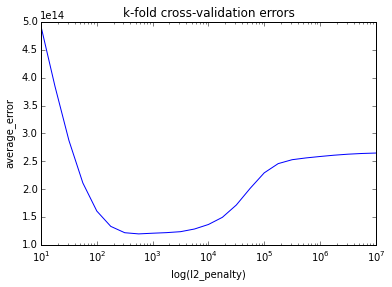

In [156]:
# Plot the l2_penalty values in the x axis and the cross-validation error in the y axis.
# Using plt.xscale('log') will make your plot more intuitive.

plt.plot([x[0] for x in results], [y[1] for y in results],'-')
plt.xscale('log')
plt.xlabel('log(l2_penalty)')
plt.ylabel('average_error')
plt.title('k-fold cross-validation errors')

### best model test the remainder

In [157]:
poly15_data = polynomial_sframe(train_valid_shuffled['sqft_living'], 15)
my_features = poly15_data.column_names()
poly15_data['price'] = train_valid_shuffled['price'] # add price to the data since it's the target
l2_penalty_optimum = 1000.0   
model = graphlab.linear_regression.create(poly15_data, 
                                          target = 'price', 
                                          features = my_features, 
                                          l2_penalty=l2_penalty_optimum, 
                                          validation_set = None, 
                                          verbose=False)
# First get the predictions
predictions = model.predict(test)
# then compute the residuals (since we are squaring it doesn't matter which order you subtract)
residuals = test['price'] - predictions
# square the residuals and add them up
residuals_squared = residuals * residuals
RSS = residuals_squared.sum()
print("RSS: $%.6f" % (RSS))

RSS: $252897427447157.500000
